In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.optimize import minimize

In [2]:
from gp_fit import GP_model

In [3]:
df=pd.read_csv('weather.csv')
temp = df['temperature'].to_numpy()
pres = df['pressure'].to_numpy()
X = df[['lon', 'lat']].to_numpy()

In [4]:
#Gaussian process for temperature data
gp_temp = GP_model(X,temp)

In [5]:
#Chose parameters. SEE NOTE BELOW
optimal_par = gp_temp.find_optimal_parameters().x
optimal_par

array([6.12099449, 0.72590804])

parameters used =  [6.12099449 0.72590804]


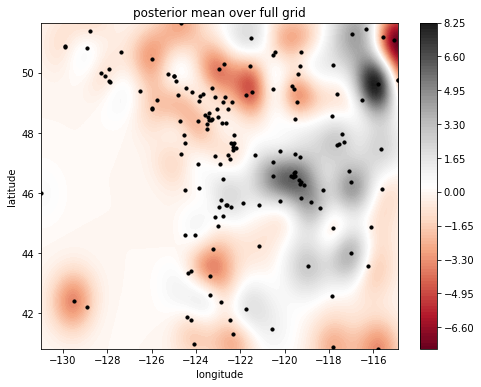

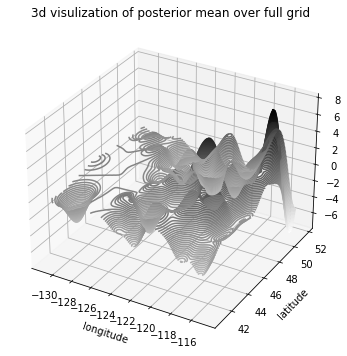

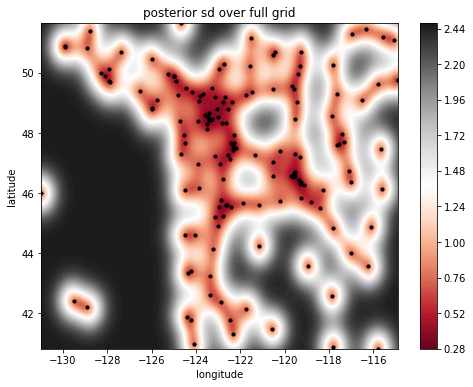

In [6]:
#Obtain posterior predictive estimate over full grid and plot
gp_temp.posterior_contour(gp_temp.cov_exp)

In [7]:
#Gaussian process for pressure data
gp_pres = GP_model(X,pres)

parameters used =  [4.97509939e+04 1.47065040e-01]


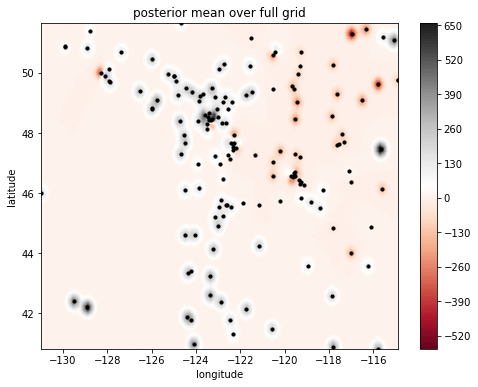

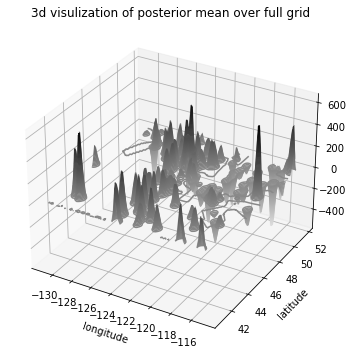

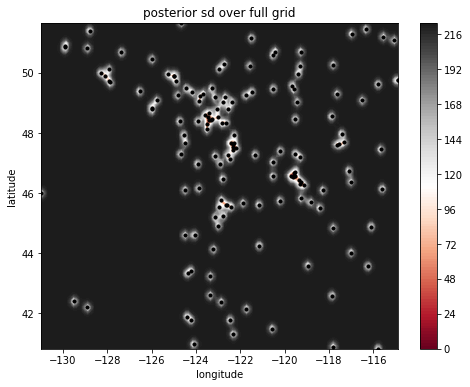

In [8]:
gp_pres.posterior_contour(gp_pres.cov_exp)

Note: for chosing the parameters, I ended up using built-in function + exponential kernel
I also tried with:
a)self-coded grid search: was also giving me extreme numbers like the ones this function finds
b)different kernel (matern 5/2). gives simular results using self-coded grid and gives errors using built-in maximizer